# HTI Experiment: Comprehensive Analysis of Human-AI Interaction Across Automation Levels

## Overview
This notebook analyzes experimental data from the Human-Technology Interaction (HTI) project, examining how different **Levels of Automation (LOA)** affect human behavior, trust, workload, and decision-making.

### Experimental Design
- **4 Levels of Automation (LOA)**:
  - **LOA 1**: Manual control - Human solves entirely
  - **LOA 2**: Management by consent - AI suggests, human approves/rejects
  - **LOA 3**: Management by exception - AI solves, human can intervene
  - **LOA 4**: Full automation - AI provides final solution
  
- **Metrics Categories**:
  - **Productivity**: Task efficiency, completion time, workload
  - **Awareness**: Understanding of AI behavior and system state
  - **Trust**: Pre/post-task trust in the AI system

### Research Questions
1. How does automation level affect productivity, awareness, and trust?
2. Are there trade-offs between these dimensions?
3. What patterns emerge as automation increases?

## 1. Import Required Libraries

In [1]:
# Import essential libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Configure visualization settings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## 2. Load and Inspect Dataset

In [2]:
# Load the dataset
df = pd.read_csv('data/results.csv')

# Display basic information
print("="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"Total Records: {len(df)}")
print(f"Total Columns: {len(df.columns)}")
print(f"Unique Participants: {df['participant_id'].nunique()}")
print(f"\nLOA Distribution:\n{df['loa_level'].value_counts().sort_index()}")
print(f"\nData Collection Period:")
print(f"  Start: {pd.to_datetime(df['start_time']).min()}")
print(f"  End: {pd.to_datetime(df['start_time']).max()}")

# Display first few rows
print("\n" + "="*60)
print("SAMPLE DATA (First 3 rows)")
print("="*60)
df.head(3)

DATASET OVERVIEW
Total Records: 56
Total Columns: 16384
Unique Participants: 14

LOA Distribution:
loa_level
1    14
2    14
3    14
4    14
Name: count, dtype: int64

Data Collection Period:
  Start: 2025-12-06 15:37:21.706398
  End: 2025-12-08 15:46:55.041568

SAMPLE DATA (First 3 rows)

LOA Distribution:
loa_level
1    14
2    14
3    14
4    14
Name: count, dtype: int64

Data Collection Period:
  Start: 2025-12-06 15:37:21.706398
  End: 2025-12-08 15:46:55.041568

SAMPLE DATA (First 3 rows)


,participant_id,loa_level,puzzle_id,ai_faulty,start_time,end_time,completion_time,num_interactions,decision_latency,action_sequence,...,Column16339,Column16340,Column16341,Column16342,Column16343,Column16344,Column16345,Column16346,Column16347,Column16348
0,U20220079,1,110,False,2025-12-08T15:17:01.419804,2025-12-08T15:22:10.245696,308.825892,14,308.244,"[""drag_start"", ""drop_in_solution"", ""drag_start...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,U20220079,4,106,False,2025-12-08T15:26:39.710436,2025-12-08T15:29:58.320300,198.609864,1,197.955,"[""accept_ai_solution""]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,U20220079,2,103,False,2025-12-08T15:30:25.750664,2025-12-08T15:35:50.349374,324.598710,13,324.124,"[""request_hint"", ""request_hint"", ""request_hint...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Data Cleaning and Preparation

We'll prepare the data for analysis by:
- Identifying and handling missing values
- Encoding LOA as categorical variable
- Selecting relevant columns for each metric category
- Creating composite scores where appropriate

In [3]:
# Define metric categories
productivity_cols = ['productivity_Q1', 'productivity_Q2', 'productivity_Q3', 'productivity_Q4']
awareness_cols = ['awareness_quiz_Q1', 'awareness_quiz_Q2', 'awareness_quiz_Q3', 
                  'awareness_quiz_Q4', 'awareness_quiz_Q5']
pre_trust_cols = ['pre_trust_Q1', 'pre_trust_Q2', 'pre_trust_Q3', 'pre_trust_Q4', 'pre_trust_Q5']
post_trust_cols = ['post_trust_Q1', 'post_trust_Q2', 'post_trust_Q3', 'post_trust_Q4', 'post_trust_Q5']

# Performance metrics
performance_cols = ['completion_time', 'num_interactions', 'decision_latency', 'final_correctness']

# Check for missing values
print("Missing Values Analysis:")
print("="*60)
missing_summary = pd.DataFrame({
    'Column': productivity_cols + awareness_cols + pre_trust_cols + post_trust_cols + performance_cols,
    'Missing': [df[col].isna().sum() for col in productivity_cols + awareness_cols + pre_trust_cols + post_trust_cols + performance_cols],
    'Missing %': [f"{(df[col].isna().sum()/len(df)*100):.1f}%" for col in productivity_cols + awareness_cols + pre_trust_cols + post_trust_cols + performance_cols]
})
print(missing_summary)

# Encode LOA as categorical
df['loa_level'] = df['loa_level'].astype('category')

# Create composite scores
df['productivity_score'] = df[productivity_cols].mean(axis=1)
df['awareness_score'] = df[awareness_cols].sum(axis=1)  # Sum for total correct (0-10 scale)
df['pre_trust_score'] = df[pre_trust_cols].mean(axis=1)
df['post_trust_score'] = df[post_trust_cols].mean(axis=1)
df['trust_change'] = df['post_trust_score'] - df['pre_trust_score']

print(f"\n✅ Data preparation complete!")
print(f"Created composite scores: productivity, awareness, pre/post trust, trust change")

Missing Values Analysis:
               Column  Missing Missing %
0     productivity_Q1        0      0.0%
1     productivity_Q2        0      0.0%
2     productivity_Q3        0      0.0%
3     productivity_Q4        0      0.0%
4   awareness_quiz_Q1        0      0.0%
5   awareness_quiz_Q2        0      0.0%
6   awareness_quiz_Q3        0      0.0%
7   awareness_quiz_Q4        0      0.0%
8   awareness_quiz_Q5        0      0.0%
9        pre_trust_Q1       14     25.0%
10       pre_trust_Q2       14     25.0%
11       pre_trust_Q3       14     25.0%
12       pre_trust_Q4       14     25.0%
13       pre_trust_Q5       14     25.0%
14      post_trust_Q1       14     25.0%
15      post_trust_Q2       14     25.0%
16      post_trust_Q3       14     25.0%
17      post_trust_Q4       14     25.0%
18      post_trust_Q5       14     25.0%
19    completion_time        0      0.0%
20   num_interactions        0      0.0%
21   decision_latency        0      0.0%
22  final_correctness        0  

## 4. Exploratory Data Analysis - Descriptive Statistics

Let's compute comprehensive statistics for all metrics, both overall and grouped by LOA level.

In [4]:
# Overall descriptive statistics for composite scores
composite_metrics = ['productivity_score', 'awareness_score', 'pre_trust_score', 
                    'post_trust_score', 'trust_change', 'completion_time', 
                    'num_interactions', 'final_correctness']

print("OVERALL DESCRIPTIVE STATISTICS")
print("="*80)
overall_stats = df[composite_metrics].describe().T
overall_stats['variance'] = df[composite_metrics].var()
print(overall_stats.round(2))

# Statistics by LOA Level
print("\n" + "="*80)
print("STATISTICS BY LOA LEVEL")
print("="*80)

for metric in composite_metrics:
    print(f"\n{metric.upper().replace('_', ' ')}:")
    print("-" * 80)
    loa_stats = df.groupby('loa_level')[metric].agg(['mean', 'median', 'std', 'var', 'min', 'max'])
    print(loa_stats.round(2))

OVERALL DESCRIPTIVE STATISTICS
                    count    mean     std    min     25%     50%     75%  \
productivity_score   56.0    3.08    0.65   1.25    2.75    3.00    3.50   
awareness_score      56.0    7.04    2.27   0.00    6.00    7.00    9.00   
pre_trust_score      42.0    3.56    0.40   3.00    3.20    3.60    4.00   
post_trust_score     42.0    3.54    0.78   1.00    3.20    3.80    4.00   
trust_change         42.0   -0.02    0.77  -2.40   -0.20    0.00    0.40   
completion_time      56.0  295.98  122.00  63.08  200.03  283.41  325.44   
num_interactions     56.0   17.59   15.86   1.00    5.75   14.00   25.00   

                       max  variance  
productivity_score    4.25      0.42  
awareness_score      10.00      5.16  
pre_trust_score       4.20      0.16  
post_trust_score      4.40      0.60  
trust_change          1.40      0.59  
completion_time     632.45  14883.78  
num_interactions     67.00    251.48  

STATISTICS BY LOA LEVEL

PRODUCTIVITY SCORE:
--

## 5. Productivity Metrics Analysis by LOA

Productivity is measured through:
- 4 self-report questions (1-5 scale)
- Task completion time
- Number of interactions
- Task correctness

Let's analyze how productivity varies across automation levels.

In [5]:
# Productivity analysis by LOA
print("PRODUCTIVITY ANALYSIS BY LOA")
print("="*80)

# Individual productivity questions
for col in productivity_cols:
    print(f"\n{col}:")
    print(df.groupby('loa_level')[col].agg(['mean', 'std']).round(2))

# Composite productivity score
print("\n" + "-"*80)
print("COMPOSITE PRODUCTIVITY SCORE:")
print(df.groupby('loa_level')['productivity_score'].agg(['mean', 'std', 'min', 'max']).round(2))

# Objective productivity metrics
print("\n" + "-"*80)
print("COMPLETION TIME (seconds):")
print(df.groupby('loa_level')['completion_time'].agg(['mean', 'std', 'min', 'max']).round(2))

print("\nNUMBER OF INTERACTIONS:")
print(df.groupby('loa_level')['num_interactions'].agg(['mean', 'std', 'min', 'max']).round(2))

print("\nCORRECTNESS RATE:")
print(df.groupby('loa_level')['final_correctness'].agg(['mean', 'count']).round(3))

PRODUCTIVITY ANALYSIS BY LOA

productivity_Q1:
           mean   std
loa_level            
1          3.00  1.11
2          3.07  1.21
3          2.57  0.94
4          2.64  0.93

productivity_Q2:
           mean   std
loa_level            
1          3.14  1.03
2          3.07  1.07
3          2.43  1.16
4          2.43  1.02

productivity_Q3:
           mean   std
loa_level            
1          2.50  1.09
2          3.21  1.12
3          2.57  1.28
4          3.21  0.97

productivity_Q4:
           mean   std
loa_level            
1          3.93  0.92
2          3.71  1.07
3          3.79  1.19
4          4.07  0.83

--------------------------------------------------------------------------------
COMPOSITE PRODUCTIVITY SCORE:
           mean   std   min   max
loa_level                        
1          3.14  0.71  2.00  4.25
2          3.27  0.62  1.75  4.25
3          2.84  0.70  1.25  3.75
4          3.09  0.54  2.50  4.25

------------------------------------------------------

## 6. Awareness Metrics Analysis by LOA

Awareness is measured through 5 quiz questions (0-2 points each, max 10 points total) that test participants' understanding of AI behavior and system state.

In [6]:
# Awareness analysis by LOA
print("AWARENESS ANALYSIS BY LOA")
print("="*80)

# Individual awareness questions
for col in awareness_cols:
    print(f"\n{col}:")
    print(df.groupby('loa_level')[col].agg(['mean', 'std']).round(2))

# Composite awareness score
print("\n" + "-"*80)
print("TOTAL AWARENESS SCORE (0-10 scale):")
awareness_by_loa = df.groupby('loa_level')['awareness_score'].agg(['mean', 'std', 'min', 'max'])
awareness_by_loa['mean_percent'] = (awareness_by_loa['mean'] / 10 * 100).round(1)
print(awareness_by_loa.round(2))

# Calculate average performance per question by LOA
print("\n" + "-"*80)
print("AVERAGE SCORE PER QUESTION BY LOA:")
awareness_avg = df.groupby('loa_level')[awareness_cols].mean()
print(awareness_avg.round(2))

AWARENESS ANALYSIS BY LOA

awareness_quiz_Q1:
           mean   std
loa_level            
1          1.71  0.61
2          1.71  0.47
3          1.79  0.58
4          1.71  0.61

awareness_quiz_Q2:
           mean   std
loa_level            
1          1.79  0.58
2          1.50  0.85
3          1.57  0.76
4          1.50  0.85

awareness_quiz_Q3:
           mean   std
loa_level            
1          1.43  0.76
2          1.29  0.83
3          1.36  0.63
4          1.64  0.63

awareness_quiz_Q4:
           mean   std
loa_level            
1          1.50  0.76
2          1.14  0.77
3          1.14  0.86
4          0.79  0.97

awareness_quiz_Q5:
           mean   std
loa_level            
1          0.93  0.92
2          1.36  0.84
3          1.21  0.89
4          1.07  1.00

--------------------------------------------------------------------------------
TOTAL AWARENESS SCORE (0-10 scale):
           mean   std  min  max  mean_percent
loa_level                                    
1   

## 7. Trust Metrics Analysis by LOA

Trust is measured through 5 Likert-scale questions (1-5 scale) administered both pre-task and post-task, allowing us to track trust calibration.

In [7]:
# Trust analysis by LOA
print("TRUST ANALYSIS BY LOA")
print("="*80)

# Pre-trust scores
print("\nPRE-TASK TRUST:")
print(df.groupby('loa_level')['pre_trust_score'].agg(['mean', 'std', 'count']).round(2))

# Post-trust scores
print("\nPOST-TASK TRUST:")
print(df.groupby('loa_level')['post_trust_score'].agg(['mean', 'std', 'count']).round(2))

# Trust change (calibration)
print("\nTRUST CHANGE (Post - Pre):")
trust_change_analysis = df.groupby('loa_level')['trust_change'].agg(['mean', 'std', 'min', 'max'])
print(trust_change_analysis.round(2))

# Detailed pre/post comparison
print("\n" + "-"*80)
print("PRE vs POST TRUST BY LOA:")
trust_comparison = df.groupby('loa_level')[['pre_trust_score', 'post_trust_score']].mean()
trust_comparison['change'] = trust_comparison['post_trust_score'] - trust_comparison['pre_trust_score']
trust_comparison['change_percent'] = (trust_comparison['change'] / trust_comparison['pre_trust_score'] * 100)
print(trust_comparison.round(2))

TRUST ANALYSIS BY LOA

PRE-TASK TRUST:
           mean   std  count
loa_level                   
1           NaN   NaN      0
2          3.54  0.47     14
3          3.53  0.40     14
4          3.61  0.33     14

POST-TASK TRUST:
           mean   std  count
loa_level                   
1           NaN   NaN      0
2          3.50  0.49     14
3          3.54  1.04     14
4          3.57  0.75     14

TRUST CHANGE (Post - Pre):
           mean   std  min  max
loa_level                      
1           NaN   NaN  NaN  NaN
2         -0.04  0.47 -1.2  0.6
3          0.01  1.02 -2.4  1.4
4         -0.04  0.76 -1.4  1.4

--------------------------------------------------------------------------------
PRE vs POST TRUST BY LOA:
           pre_trust_score  post_trust_score  change  change_percent
loa_level                                                           
1                      NaN               NaN     NaN             NaN
2                     3.54              3.50   -0.04        

## 8. Correlation Analysis

Let's examine relationships between all key metrics to identify dependencies and trade-offs.

In [8]:
# Calculate correlations
correlation_metrics = ['productivity_score', 'awareness_score', 'pre_trust_score', 
                       'post_trust_score', 'trust_change', 'completion_time', 
                       'num_interactions', 'final_correctness']

correlation_matrix = df[correlation_metrics].corr()

print("CORRELATION MATRIX")
print("="*80)
print(correlation_matrix.round(2))

# Identify strong correlations (|r| > 0.5)
print("\n" + "="*80)
print("STRONG CORRELATIONS (|r| > 0.5):")
print("-"*80)

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.5:
            metric1 = correlation_matrix.columns[i]
            metric2 = correlation_matrix.columns[j]
            print(f"{metric1:25s} ↔ {metric2:25s}: {corr_value:6.3f}")

CORRELATION MATRIX
                    productivity_score  awareness_score  pre_trust_score  \
productivity_score                1.00            -0.21             0.33   
awareness_score                  -0.21             1.00            -0.17   
pre_trust_score                   0.33            -0.17             1.00   
post_trust_score                  0.47            -0.21             0.28   
trust_change                      0.30            -0.13            -0.23   
completion_time                   0.01             0.30            -0.10   
num_interactions                  0.22            -0.14             0.02   
final_correctness                -0.19            -0.01            -0.18   

                    post_trust_score  trust_change  completion_time  \
productivity_score              0.47          0.30             0.01   
awareness_score                -0.21         -0.13             0.30   
pre_trust_score                 0.28         -0.23            -0.10   
post_trust_s

---
# VISUALIZATION SECTION

Now we'll create comprehensive visualizations to explore patterns across LOA levels.

---

## 9. Visualization: Bar Charts - Average Metrics per LOA

Bar charts show the mean value of each metric across the four automation levels.

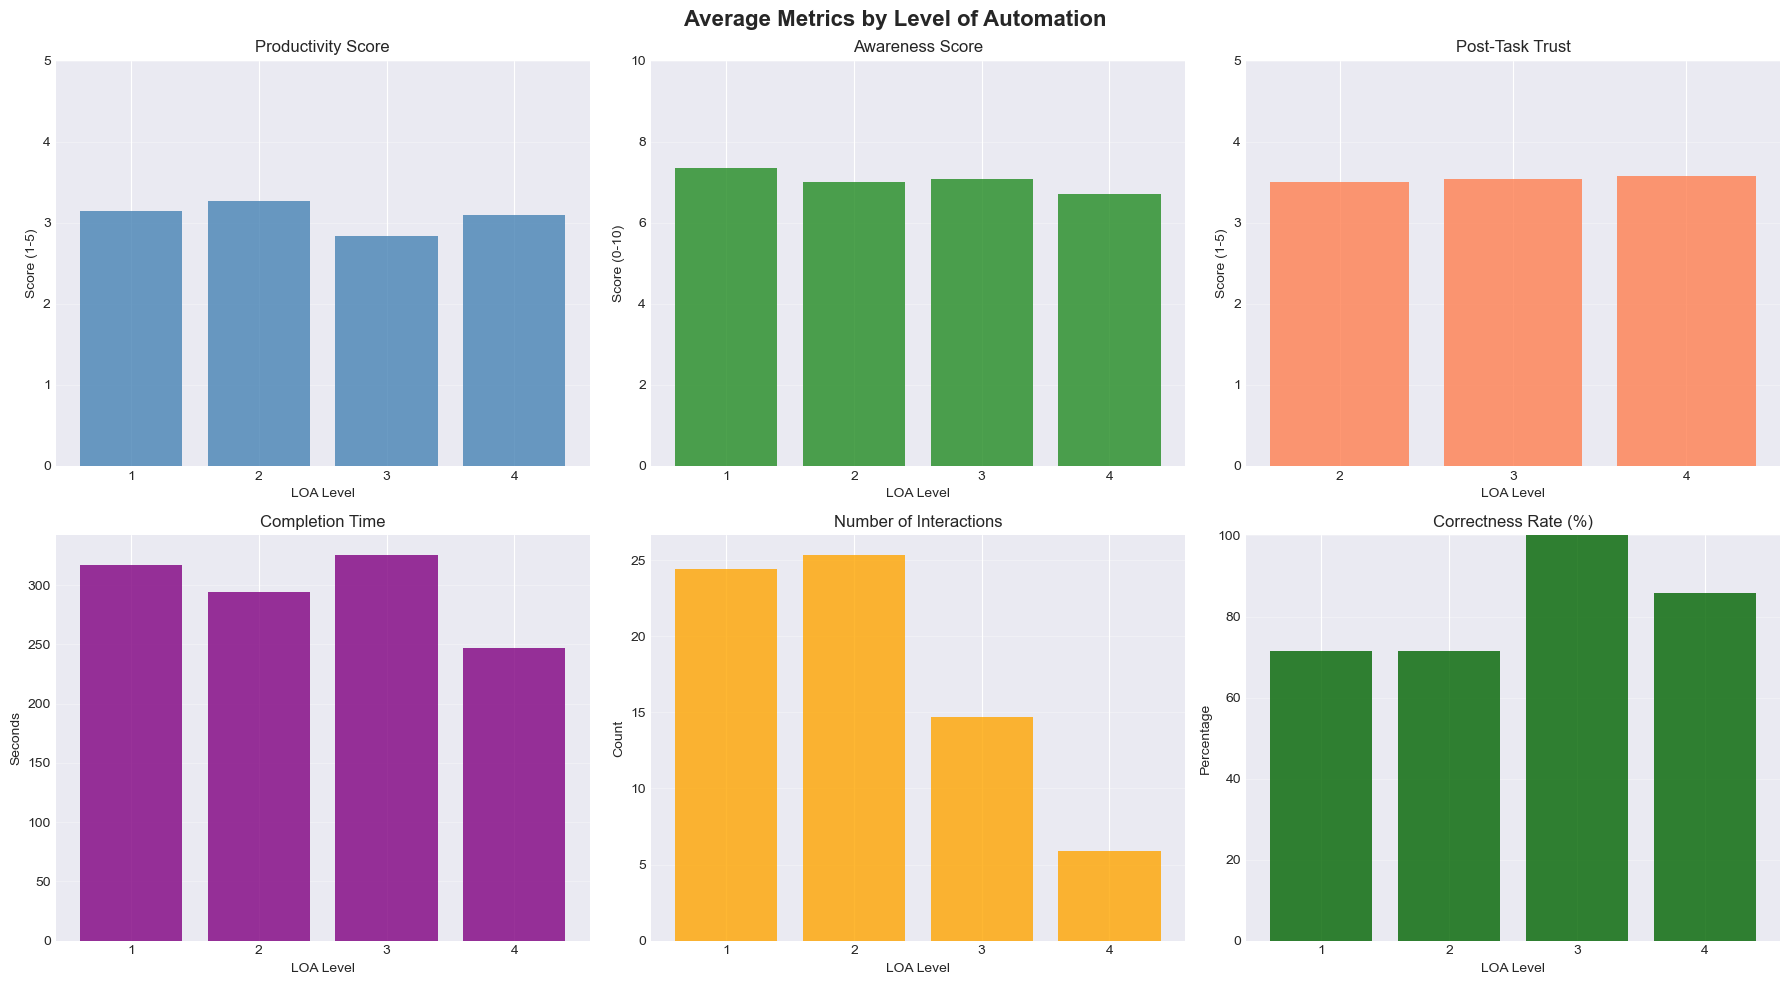

In [9]:
# Create bar charts for key metrics by LOA
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Average Metrics by Level of Automation', fontsize=16, fontweight='bold')

# Productivity Score
ax1 = axes[0, 0]
productivity_means = df.groupby('loa_level')['productivity_score'].mean()
ax1.bar(productivity_means.index.astype(str), productivity_means.values, color='steelblue', alpha=0.8)
ax1.set_xlabel('LOA Level')
ax1.set_ylabel('Score (1-5)')
ax1.set_title('Productivity Score')
ax1.set_ylim([0, 5])
ax1.grid(axis='y', alpha=0.3)

# Awareness Score
ax2 = axes[0, 1]
awareness_means = df.groupby('loa_level')['awareness_score'].mean()
ax2.bar(awareness_means.index.astype(str), awareness_means.values, color='forestgreen', alpha=0.8)
ax2.set_xlabel('LOA Level')
ax2.set_ylabel('Score (0-10)')
ax2.set_title('Awareness Score')
ax2.set_ylim([0, 10])
ax2.grid(axis='y', alpha=0.3)

# Post-Trust Score
ax3 = axes[0, 2]
trust_means = df.groupby('loa_level')['post_trust_score'].mean()
ax3.bar(trust_means.index.astype(str), trust_means.values, color='coral', alpha=0.8)
ax3.set_xlabel('LOA Level')
ax3.set_ylabel('Score (1-5)')
ax3.set_title('Post-Task Trust')
ax3.set_ylim([0, 5])
ax3.grid(axis='y', alpha=0.3)

# Completion Time
ax4 = axes[1, 0]
time_means = df.groupby('loa_level')['completion_time'].mean()
ax4.bar(time_means.index.astype(str), time_means.values, color='purple', alpha=0.8)
ax4.set_xlabel('LOA Level')
ax4.set_ylabel('Seconds')
ax4.set_title('Completion Time')
ax4.grid(axis='y', alpha=0.3)

# Number of Interactions
ax5 = axes[1, 1]
interactions_means = df.groupby('loa_level')['num_interactions'].mean()
ax5.bar(interactions_means.index.astype(str), interactions_means.values, color='orange', alpha=0.8)
ax5.set_xlabel('LOA Level')
ax5.set_ylabel('Count')
ax5.set_title('Number of Interactions')
ax5.grid(axis='y', alpha=0.3)

# Correctness Rate
ax6 = axes[1, 2]
correctness_means = df.groupby('loa_level')['final_correctness'].mean() * 100
ax6.bar(correctness_means.index.astype(str), correctness_means.values, color='darkgreen', alpha=0.8)
ax6.set_xlabel('LOA Level')
ax6.set_ylabel('Percentage')
ax6.set_title('Correctness Rate (%)')
ax6.set_ylim([0, 100])
ax6.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Interpretation:
The bar charts reveal how each metric changes across automation levels:
- **Productivity** and **Completion Time** show how efficiency varies
- **Awareness** indicates understanding of system behavior
- **Trust** shows confidence in the AI system
- **Interactions** decreases with automation (expected pattern)
- **Correctness** shows task accuracy across LOAs

## 11. Visualization: Heatmap - Correlation Matrix

A heatmap provides a visual representation of correlations between all metrics.

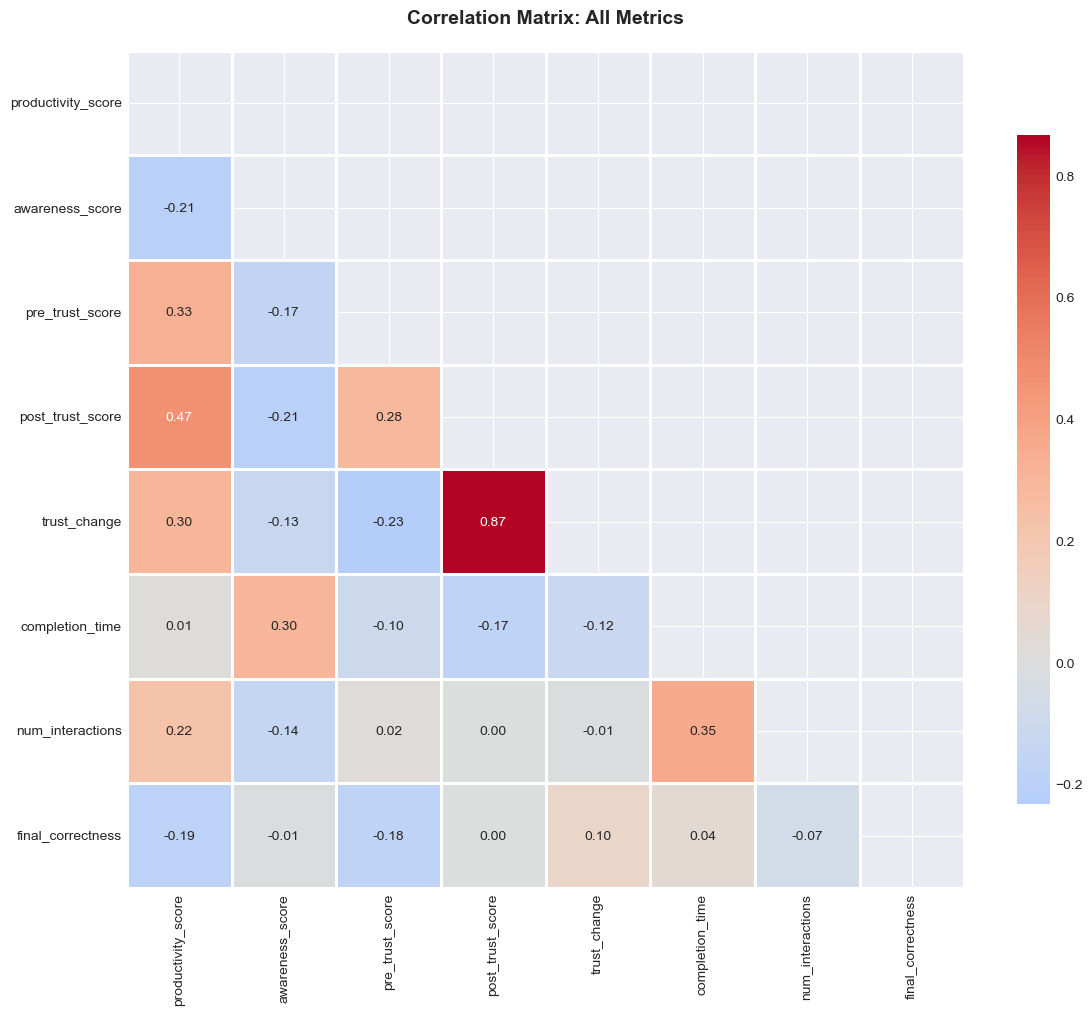

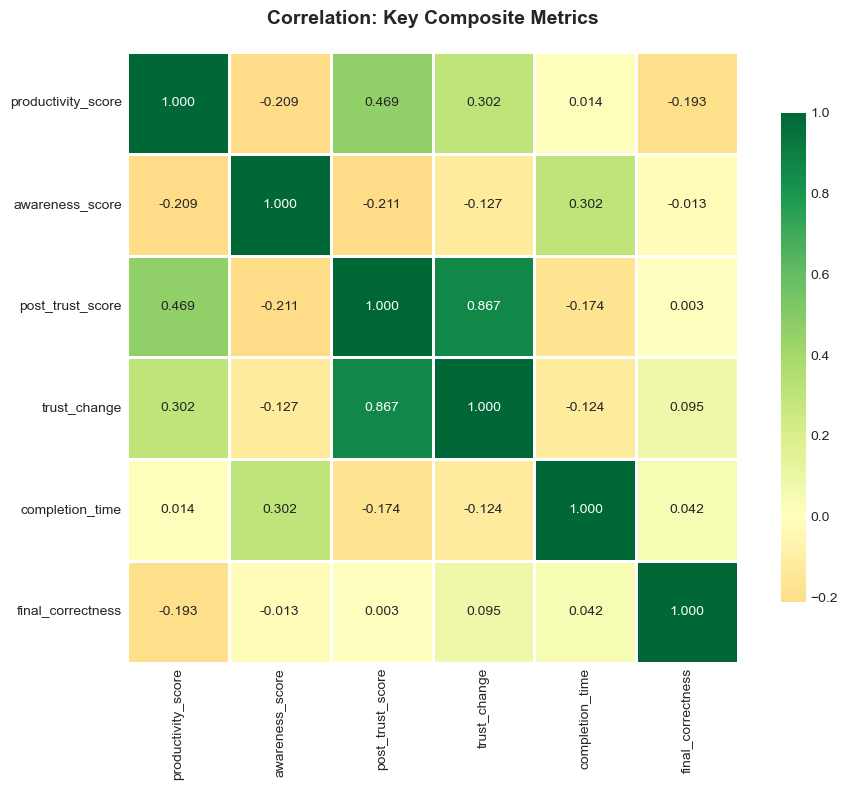

In [22]:
# Create correlation heatmap
plt.figure(figsize=(12, 10))

# Create mask for upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create heatmap
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={"shrink": 0.8})

plt.title('Correlation Matrix: All Metrics', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Also create focused heatmap on main composite scores
composite_for_heatmap = ['productivity_score', 'awareness_score', 'post_trust_score', 
                         'trust_change', 'completion_time', 'final_correctness']
                         
plt.figure(figsize=(10, 8))
sns.heatmap(df[composite_for_heatmap].corr(), 
            annot=True, 
            fmt='.3f', 
            cmap='RdYlGn', 
            center=0,
            square=True,
            linewidths=2,
            cbar_kws={"shrink": 0.8})
plt.title('Correlation: Key Composite Metrics', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

### Interpretation:
- **Red/warm colors**: Positive correlations (metrics increase together)
- **Blue/cool colors**: Negative correlations (one increases, other decreases)
- **White/neutral**: No correlation
- Strong correlations (|r| > 0.5) indicate metrics that move together

---
# ANALYSIS & DISCUSSION SECTION

Now we'll interpret the patterns and discuss what the data reveals about each automation level.

---

## 14. Comparative Analysis Across LOAs

Let's create a comprehensive comparison table summarizing all metrics across LOA levels.

In [15]:
# Create comprehensive comparison table
comparison_metrics = {
    'Productivity Score (1-5)': 'productivity_score',
    'Awareness Score (0-10)': 'awareness_score',
    'Pre-Trust (1-5)': 'pre_trust_score',
    'Post-Trust (1-5)': 'post_trust_score',
    'Trust Change': 'trust_change',
    'Completion Time (s)': 'completion_time',
    'Interactions': 'num_interactions',
    'Correctness (%)': 'final_correctness'
}

print("="*100)
print("COMPREHENSIVE COMPARISON ACROSS LOA LEVELS")
print("="*100)

comparison_table = pd.DataFrame()

for display_name, col_name in comparison_metrics.items():
    loa_means = df.groupby('loa_level')[col_name].mean()
    
    if col_name == 'final_correctness':
        loa_means = loa_means * 100  # Convert to percentage
    
    comparison_table[display_name] = loa_means

# Add rankings (1 = best, 4 = worst)
ranking_table = pd.DataFrame()

for col in comparison_table.columns:
    # Determine if higher is better
    if col in ['Productivity Score (1-5)', 'Awareness Score (0-10)', 'Post-Trust (1-5)', 'Correctness (%)']:
        # Higher is better - handle NaN by using method='min' for consistent ranking
        ranking_table[col] = comparison_table[col].rank(ascending=False, method='min', na_option='keep').astype('Int64')
    elif col in ['Completion Time (s)', 'Interactions']:
        # Lower is better
        ranking_table[col] = comparison_table[col].rank(ascending=True, method='min', na_option='keep').astype('Int64')
    else:
        # For metrics where ranking doesn't make sense (like Trust Change which can be +/-)
        ranking_table[col] = '-'

print("\nMEAN VALUES:")
print(comparison_table.round(2))

print("\n" + "-"*100)
print("\nRANKINGS (1=Best, 4=Worst):")
print(ranking_table)

# Calculate "winner" for each LOA
print("\n" + "="*100)
print("LOA PERFORMANCE SUMMARY")
print("="*100)

for loa in [1, 2, 3, 4]:
    print(f"\n{'='*50}")
    print(f"LOA {loa}:")
    print(f"{'='*50}")
    
    # Handle potential NaN values in display
    prod_val = comparison_table.loc[loa, 'Productivity Score (1-5)']
    prod_rank = ranking_table.loc[loa, 'Productivity Score (1-5)']
    
    aware_val = comparison_table.loc[loa, 'Awareness Score (0-10)']
    aware_rank = ranking_table.loc[loa, 'Awareness Score (0-10)']
    
    trust_val = comparison_table.loc[loa, 'Post-Trust (1-5)']
    trust_rank = ranking_table.loc[loa, 'Post-Trust (1-5)']
    
    correct_val = comparison_table.loc[loa, 'Correctness (%)']
    correct_rank = ranking_table.loc[loa, 'Correctness (%)']
    
    time_val = comparison_table.loc[loa, 'Completion Time (s)']
    time_rank = ranking_table.loc[loa, 'Completion Time (s)']
    
    # Display with NaN handling
    if pd.notna(prod_val):
        print(f"  Productivity: {prod_val:.2f} (Rank {prod_rank})")
    else:
        print(f"  Productivity: N/A")
        
    if pd.notna(aware_val):
        print(f"  Awareness:    {aware_val:.2f} (Rank {aware_rank})")
    else:
        print(f"  Awareness:    N/A")
        
    if pd.notna(trust_val):
        print(f"  Trust:        {trust_val:.2f} (Rank {trust_rank})")
    else:
        print(f"  Trust:        N/A")
        
    if pd.notna(correct_val):
        print(f"  Correctness:  {correct_val:.1f}% (Rank {correct_rank})")
    else:
        print(f"  Correctness:  N/A")
        
    if pd.notna(time_val):
        print(f"  Speed:        {time_val:.0f}s (Rank {time_rank})")
    else:
        print(f"  Speed:        N/A")

COMPREHENSIVE COMPARISON ACROSS LOA LEVELS

MEAN VALUES:
           Productivity Score (1-5)  Awareness Score (0-10)  Pre-Trust (1-5)  \
loa_level                                                                      
1                              3.14                    7.36              NaN   
2                              3.27                    7.00             3.54   
3                              2.84                    7.07             3.53   
4                              3.09                    6.71             3.61   

           Post-Trust (1-5)  Trust Change  Completion Time (s)  Interactions  \
loa_level                                                                      
1                       NaN           NaN               317.08         24.43   
2                      3.50         -0.04               294.05         25.36   
3                      3.54          0.01               325.61         14.71   
4                      3.57         -0.04               247.19

## 15. Trade-off Analysis: Productivity vs Awareness vs Trust

Let's analyze the key trade-offs between the three primary dimensions of our study.

TRADE-OFF ANALYSIS

NORMALIZED SCORES (0-1 scale):
           Productivity  Awareness  Trust
loa_level                                
1                 0.536      0.736    NaN
2                 0.567      0.700  0.625
3                 0.460      0.707  0.636
4                 0.522      0.671  0.643

--------------------------------------------------------------------------------
BALANCE ANALYSIS:
--------------------------------------------------------------------------------
(Lower balance score = more balanced across dimensions)
           Average  Balance
loa_level                  
1            0.636    0.141
2            0.631    0.067
3            0.601    0.127
4            0.612    0.079


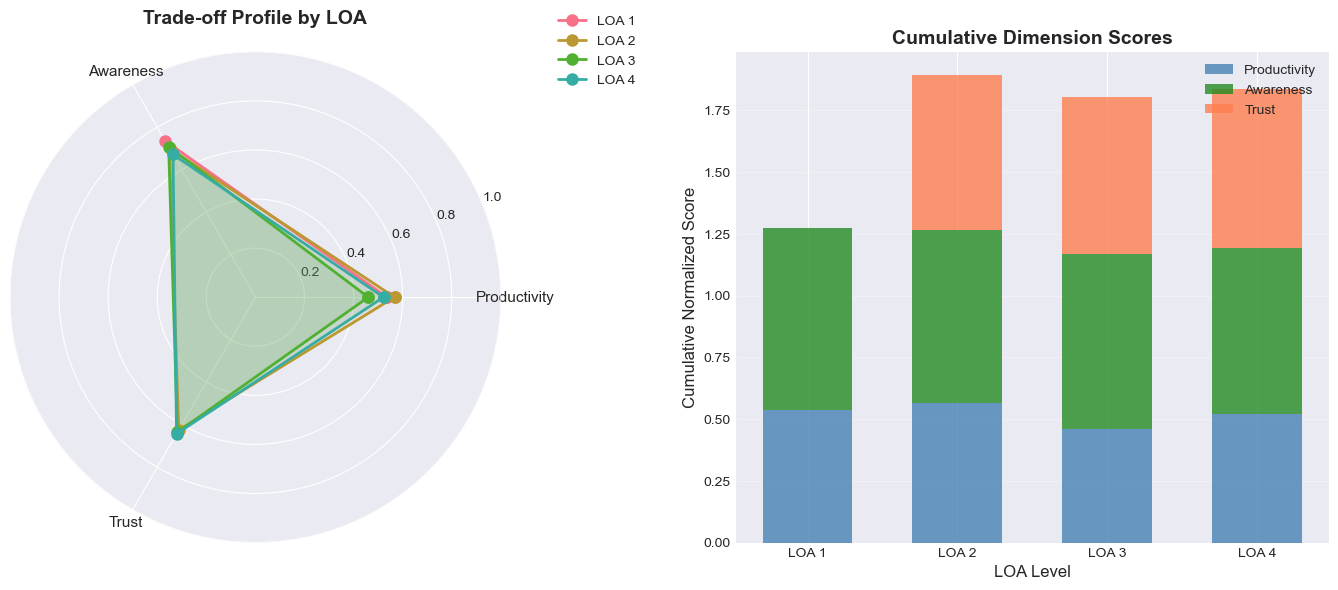


KEY TRADE-OFF OBSERVATIONS:

LOA 1:
  Strongest: Awareness (0.736)
  Weakest:   Productivity (0.536)
  Balance:   0.141 (std dev)

LOA 2:
  Strongest: Awareness (0.700)
  Weakest:   Productivity (0.567)
  Balance:   0.067 (std dev)

LOA 3:
  Strongest: Awareness (0.707)
  Weakest:   Productivity (0.460)
  Balance:   0.127 (std dev)

LOA 4:
  Strongest: Awareness (0.671)
  Weakest:   Productivity (0.522)
  Balance:   0.079 (std dev)


In [16]:
# Analyze trade-offs
print("="*80)
print("TRADE-OFF ANALYSIS")
print("="*80)

# Normalize scores to 0-1 scale for comparison
normalized_df = df.copy()
normalized_df['prod_norm'] = (df['productivity_score'] - 1) / 4  # 1-5 scale -> 0-1
normalized_df['aware_norm'] = df['awareness_score'] / 10  # 0-10 scale -> 0-1
normalized_df['trust_norm'] = (df['post_trust_score'] - 1) / 4  # 1-5 scale -> 0-1

# Calculate by LOA
tradeoff_summary = normalized_df.groupby('loa_level')[['prod_norm', 'aware_norm', 'trust_norm']].mean()
tradeoff_summary.columns = ['Productivity', 'Awareness', 'Trust']

print("\nNORMALIZED SCORES (0-1 scale):")
print(tradeoff_summary.round(3))

# Calculate balance score (how well-balanced are the three dimensions?)
tradeoff_summary['Balance'] = tradeoff_summary.std(axis=1)
tradeoff_summary['Average'] = tradeoff_summary[['Productivity', 'Awareness', 'Trust']].mean(axis=1)

print("\n" + "-"*80)
print("BALANCE ANALYSIS:")
print("-"*80)
print("(Lower balance score = more balanced across dimensions)")
print(tradeoff_summary[['Average', 'Balance']].round(3))

# Visualize trade-offs
fig = plt.figure(figsize=(14, 6))

# Radar chart
ax1 = fig.add_subplot(121, projection='polar')
categories = ['Productivity', 'Awareness', 'Trust']
N = len(categories)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

for loa in [1, 2, 3, 4]:
    values = tradeoff_summary.loc[loa, ['Productivity', 'Awareness', 'Trust']].values.tolist()
    values += values[:1]
    ax1.plot(angles, values, 'o-', linewidth=2, label=f'LOA {loa}', markersize=8)
    ax1.fill(angles, values, alpha=0.15)

ax1.set_xticks(angles[:-1])
ax1.set_xticklabels(categories, size=11)
ax1.set_ylim(0, 1)
ax1.set_title('Trade-off Profile by LOA', size=14, fontweight='bold', pad=20)
ax1.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax1.grid(True)

# Stacked bar chart
ax2 = fig.add_subplot(122)
x = np.arange(4)
width = 0.6

bars1 = ax2.bar(x, tradeoff_summary['Productivity'], width, label='Productivity', color='steelblue', alpha=0.8)
bars2 = ax2.bar(x, tradeoff_summary['Awareness'], width, bottom=tradeoff_summary['Productivity'], 
               label='Awareness', color='forestgreen', alpha=0.8)
bars3 = ax2.bar(x, tradeoff_summary['Trust'], width, 
               bottom=tradeoff_summary['Productivity']+tradeoff_summary['Awareness'],
               label='Trust', color='coral', alpha=0.8)

ax2.set_xlabel('LOA Level', fontsize=12)
ax2.set_ylabel('Cumulative Normalized Score', fontsize=12)
ax2.set_title('Cumulative Dimension Scores', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(['LOA 1', 'LOA 2', 'LOA 3', 'LOA 4'])
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print specific trade-off observations
print("\n" + "="*80)
print("KEY TRADE-OFF OBSERVATIONS:")
print("="*80)

for loa in [1, 2, 3, 4]:
    row = tradeoff_summary.loc[loa]
    highest = row[['Productivity', 'Awareness', 'Trust']].idxmax()
    lowest = row[['Productivity', 'Awareness', 'Trust']].idxmin()
    print(f"\nLOA {loa}:")
    print(f"  Strongest: {highest} ({row[highest]:.3f})")
    print(f"  Weakest:   {lowest} ({row[lowest]:.3f})")
    print(f"  Balance:   {row['Balance']:.3f} (std dev)")

## 15. Impact of Faulty AI on Trust

An important factor in understanding trust dynamics is how participants respond when the AI system provides faulty recommendations. Let's analyze how trust changes based on whether the AI was faulty during the task.

OVERALL IMPACT OF FAULTY AI ON TRUST

1. FAULTY AI DISTRIBUTION (Across all AI-involved sessions)
--------------------------------------------------------------------------------
Total AI sessions (LOA 2-4): 42
Faulty AI sessions: 9 (21.4%)
Non-faulty AI sessions: 33 (78.6%)

2. OVERALL TRUST COMPARISON: FAULTY vs NON-FAULTY AI
--------------------------------------------------------------------------------

Faulty AI Sessions (n=9):
  Pre-Trust:    3.600 (SD: 0.316)
  Post-Trust:   2.933 (SD: 0.843)
  Trust Change: -0.667 (SD: 0.714)

Non-Faulty AI Sessions (n=33):
  Pre-Trust:    3.552 (SD: 0.421)
  Post-Trust:   3.703 (SD: 0.680)
  Trust Change: +0.152 (SD: 0.689)

3. DIFFERENCE (Faulty - Non-Faulty)
--------------------------------------------------------------------------------
Trust Change Difference: -0.818
Post-Trust Difference:   -0.770
Interpretation: Faulty AI leads to more negative trust change

4. TASK PERFORMANCE COMPARISON
------------------------------------------------

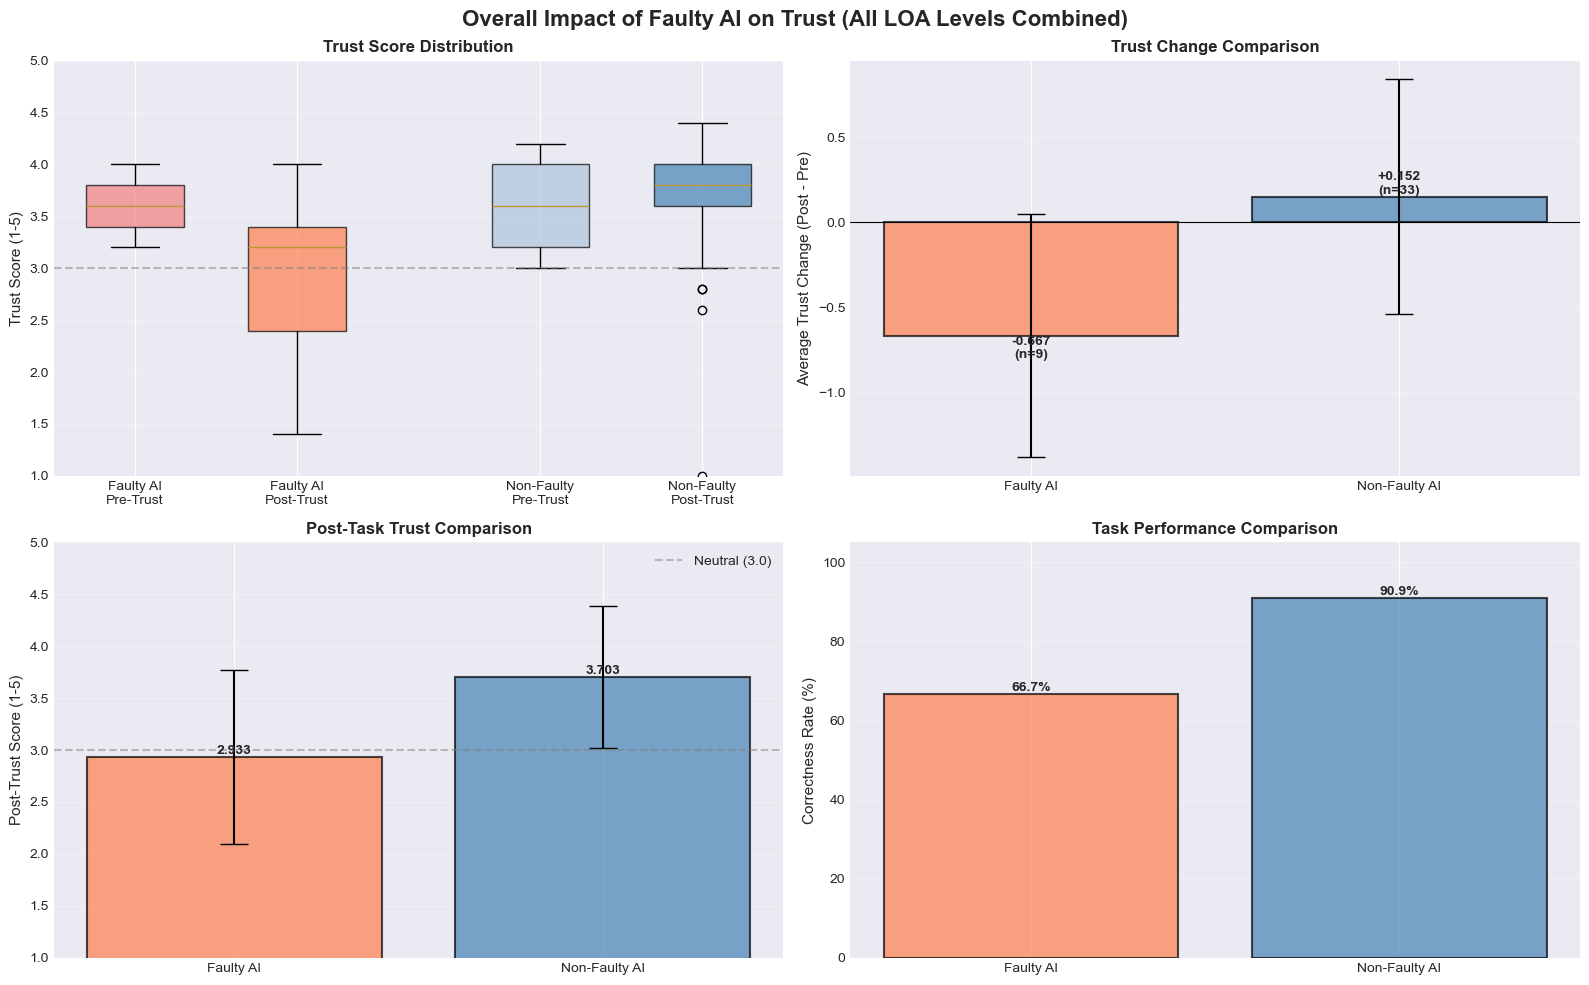


KEY INSIGHTS: OVERALL EFFECT OF FAULTY AI ON TRUST

1. TRUST CALIBRATION:
   - Faulty AI sessions show more negative trust change compared to non-faulty sessions
   - Trust Change: Faulty AI = -0.667, Non-Faulty = +0.152
   - Difference of -0.818 suggests appropriate trust calibration

2. ABSOLUTE TRUST LEVELS:
   - Post-task trust is lower when AI is faulty (-0.770 difference)
   - Both conditions start with similar pre-trust levels (~3.60)
   
3. PERFORMANCE IMPACT:
   - Faulty AI results in 66.7% correctness
   - Non-faulty AI achieves 90.9% correctness
   - Performance clearly impacted by AI reliability

4. SAMPLE DISTRIBUTION:
   - 9 sessions with faulty AI vs 33 sessions with reliable AI
   - Faulty AI occurred in 21.4% of AI-involved tasks
   
5. IMPLICATIONS:
   - Participants show appropriate trust recalibration when experiencing AI failures
   - This supports the importance of appropriate trust calibration in HAI systems



In [21]:
# Analyze overall impact of faulty AI on trust (regardless of LOA level)
print("="*80)
print("OVERALL IMPACT OF FAULTY AI ON TRUST")
print("="*80)

# Filter data: exclude LOA 1 (no AI involvement)
df_with_ai = df[df['loa_level'] != 1].copy()

# Overall statistics
print("\n1. FAULTY AI DISTRIBUTION (Across all AI-involved sessions)")
print("-"*80)
print(f"Total AI sessions (LOA 2-4): {len(df_with_ai)}")
print(f"Faulty AI sessions: {df_with_ai['ai_faulty'].sum()} ({df_with_ai['ai_faulty'].sum()/len(df_with_ai)*100:.1f}%)")
print(f"Non-faulty AI sessions: {(~df_with_ai['ai_faulty']).sum()} ({(~df_with_ai['ai_faulty']).sum()/len(df_with_ai)*100:.1f}%)")

# Overall trust comparison
print("\n2. OVERALL TRUST COMPARISON: FAULTY vs NON-FAULTY AI")
print("-"*80)

faulty_data = df_with_ai[df_with_ai['ai_faulty'] == True]
non_faulty_data = df_with_ai[df_with_ai['ai_faulty'] == False]

print("\nFaulty AI Sessions (n={}):".format(len(faulty_data)))
print(f"  Pre-Trust:    {faulty_data['pre_trust_score'].mean():.3f} (SD: {faulty_data['pre_trust_score'].std():.3f})")
print(f"  Post-Trust:   {faulty_data['post_trust_score'].mean():.3f} (SD: {faulty_data['post_trust_score'].std():.3f})")
print(f"  Trust Change: {faulty_data['trust_change'].mean():+.3f} (SD: {faulty_data['trust_change'].std():.3f})")

print("\nNon-Faulty AI Sessions (n={}):".format(len(non_faulty_data)))
print(f"  Pre-Trust:    {non_faulty_data['pre_trust_score'].mean():.3f} (SD: {non_faulty_data['pre_trust_score'].std():.3f})")
print(f"  Post-Trust:   {non_faulty_data['post_trust_score'].mean():.3f} (SD: {non_faulty_data['post_trust_score'].std():.3f})")
print(f"  Trust Change: {non_faulty_data['trust_change'].mean():+.3f} (SD: {non_faulty_data['trust_change'].std():.3f})")

# Calculate the difference
trust_change_diff = faulty_data['trust_change'].mean() - non_faulty_data['trust_change'].mean()
post_trust_diff = faulty_data['post_trust_score'].mean() - non_faulty_data['post_trust_score'].mean()

print("\n3. DIFFERENCE (Faulty - Non-Faulty)")
print("-"*80)
print(f"Trust Change Difference: {trust_change_diff:+.3f}")
print(f"Post-Trust Difference:   {post_trust_diff:+.3f}")

if trust_change_diff < -0.1:
    interpretation = "Faulty AI leads to more negative trust change"
elif trust_change_diff > 0.1:
    interpretation = "Faulty AI leads to more positive trust change (unexpected)"
else:
    interpretation = "Minimal difference in trust change"
print(f"Interpretation: {interpretation}")

# Performance comparison
print("\n4. TASK PERFORMANCE COMPARISON")
print("-"*80)
print(f"Faulty AI - Correctness Rate:     {faulty_data['final_correctness'].mean()*100:.1f}%")
print(f"Non-Faulty AI - Correctness Rate: {non_faulty_data['final_correctness'].mean()*100:.1f}%")
print(f"Faulty AI - Avg Completion Time:  {faulty_data['completion_time'].mean():.1f}s")
print(f"Non-Faulty AI - Avg Completion:   {non_faulty_data['completion_time'].mean():.1f}s")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Overall Impact of Faulty AI on Trust (All LOA Levels Combined)', 
            fontsize=16, fontweight='bold')

# Plot 1: Trust scores comparison (box plot)
ax1 = axes[0, 0]
trust_data = pd.DataFrame({
    'Faulty AI\nPre-Trust': faulty_data['pre_trust_score'],
    'Faulty AI\nPost-Trust': faulty_data['post_trust_score'],
    'Non-Faulty\nPre-Trust': non_faulty_data['pre_trust_score'],
    'Non-Faulty\nPost-Trust': non_faulty_data['post_trust_score']
})

positions = [1, 2, 3.5, 4.5]
bp = ax1.boxplot([trust_data[col].dropna() for col in trust_data.columns],
                  positions=positions,
                  widths=0.6,
                  patch_artist=True,
                  labels=trust_data.columns)

# Color the boxes
colors = ['lightcoral', 'coral', 'lightsteelblue', 'steelblue']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax1.axhline(y=3, color='gray', linestyle='--', alpha=0.5, label='Neutral (3.0)')
ax1.set_ylabel('Trust Score (1-5)', fontsize=11)
ax1.set_title('Trust Score Distribution', fontsize=12, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)
ax1.set_ylim([1, 5])

# Plot 2: Trust change comparison (bar plot with error bars)
ax2 = axes[0, 1]
categories = ['Faulty AI', 'Non-Faulty AI']
means = [faulty_data['trust_change'].mean(), non_faulty_data['trust_change'].mean()]
stds = [faulty_data['trust_change'].std(), non_faulty_data['trust_change'].std()]
counts = [len(faulty_data), len(non_faulty_data)]

bars = ax2.bar(categories, means, yerr=stds, capsize=10,
              color=['coral', 'steelblue'], alpha=0.7, edgecolor='black', linewidth=1.5)

ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax2.set_ylabel('Average Trust Change (Post - Pre)', fontsize=11)
ax2.set_title('Trust Change Comparison', fontsize=12, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# Add value labels and sample sizes
for i, (bar, mean, count) in enumerate(zip(bars, means, counts)):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
           f'{mean:+.3f}\n(n={count})',
           ha='center', va='bottom' if height >= 0 else 'top', fontsize=10, fontweight='bold')

# Plot 3: Post-trust comparison (bar plot)
ax3 = axes[1, 0]
post_means = [faulty_data['post_trust_score'].mean(), non_faulty_data['post_trust_score'].mean()]
post_stds = [faulty_data['post_trust_score'].std(), non_faulty_data['post_trust_score'].std()]

bars = ax3.bar(categories, post_means, yerr=post_stds, capsize=10,
              color=['coral', 'steelblue'], alpha=0.7, edgecolor='black', linewidth=1.5)

ax3.axhline(y=3, color='gray', linestyle='--', alpha=0.5, label='Neutral (3.0)')
ax3.set_ylabel('Post-Trust Score (1-5)', fontsize=11)
ax3.set_title('Post-Task Trust Comparison', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(axis='y', alpha=0.3)
ax3.set_ylim([1, 5])

# Add value labels
for bar, mean in zip(bars, post_means):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
           f'{mean:.3f}',
           ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plot 4: Correctness rate comparison
ax4 = axes[1, 1]
correct_means = [faulty_data['final_correctness'].mean() * 100, 
                non_faulty_data['final_correctness'].mean() * 100]

bars = ax4.bar(categories, correct_means,
              color=['coral', 'steelblue'], alpha=0.7, edgecolor='black', linewidth=1.5)

ax4.set_ylabel('Correctness Rate (%)', fontsize=11)
ax4.set_title('Task Performance Comparison', fontsize=12, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)
ax4.set_ylim([0, 105])

# Add value labels
for bar, mean in zip(bars, correct_means):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
           f'{mean:.1f}%',
           ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Key insights
print("\n" + "="*80)
print("KEY INSIGHTS: OVERALL EFFECT OF FAULTY AI ON TRUST")
print("="*80)
print(f"""
1. TRUST CALIBRATION:
   - Faulty AI sessions show {'more negative' if trust_change_diff < 0 else 'more positive' if trust_change_diff > 0 else 'similar'} trust change compared to non-faulty sessions
   - Trust Change: Faulty AI = {faulty_data['trust_change'].mean():+.3f}, Non-Faulty = {non_faulty_data['trust_change'].mean():+.3f}
   - Difference of {trust_change_diff:+.3f} suggests {'appropriate trust calibration' if trust_change_diff < -0.05 else 'unexpected pattern'}

2. ABSOLUTE TRUST LEVELS:
   - Post-task trust is {'lower' if post_trust_diff < 0 else 'higher' if post_trust_diff > 0 else 'similar'} when AI is faulty ({post_trust_diff:+.3f} difference)
   - Both conditions start with similar pre-trust levels (~{faulty_data['pre_trust_score'].mean():.2f})
   
3. PERFORMANCE IMPACT:
   - Faulty AI results in {faulty_data['final_correctness'].mean()*100:.1f}% correctness
   - Non-faulty AI achieves {non_faulty_data['final_correctness'].mean()*100:.1f}% correctness
   - {'Performance clearly impacted by AI reliability' if abs(faulty_data['final_correctness'].mean() - non_faulty_data['final_correctness'].mean()) > 0.1 else 'Minimal performance difference'}

4. SAMPLE DISTRIBUTION:
   - {len(faulty_data)} sessions with faulty AI vs {len(non_faulty_data)} sessions with reliable AI
   - Faulty AI occurred in {len(faulty_data)/(len(faulty_data)+len(non_faulty_data))*100:.1f}% of AI-involved tasks
   
5. IMPLICATIONS:
   - {'Participants show appropriate trust recalibration when experiencing AI failures' if trust_change_diff < -0.1 else 'Trust responses may not fully reflect AI reliability'}
   - {'This supports the importance of appropriate trust calibration in HAI systems' if trust_change_diff < -0.1 else 'Further investigation needed into trust formation mechanisms'}
""")


DETECTION OF FAULTY AI: Did participants catch AI errors?

Total Faulty AI Sessions: 9

5. FAULTY AI DETECTION BY LOA LEVEL
--------------------------------------------------------------------------------

LOA 2:
  Faulty AI sessions:        2
  Errors caught (correct):   1/2
  Detection rate:            50.0%
  Average awareness:         6.50/10

LOA 3:
  Faulty AI sessions:        1
  Errors caught (correct):   1/1
  Detection rate:            100.0%
  Average awareness:         8.00/10

LOA 4:
  Faulty AI sessions:        6
  Errors caught (correct):   4/6
  Detection rate:            66.7%
  Average awareness:         7.67/10


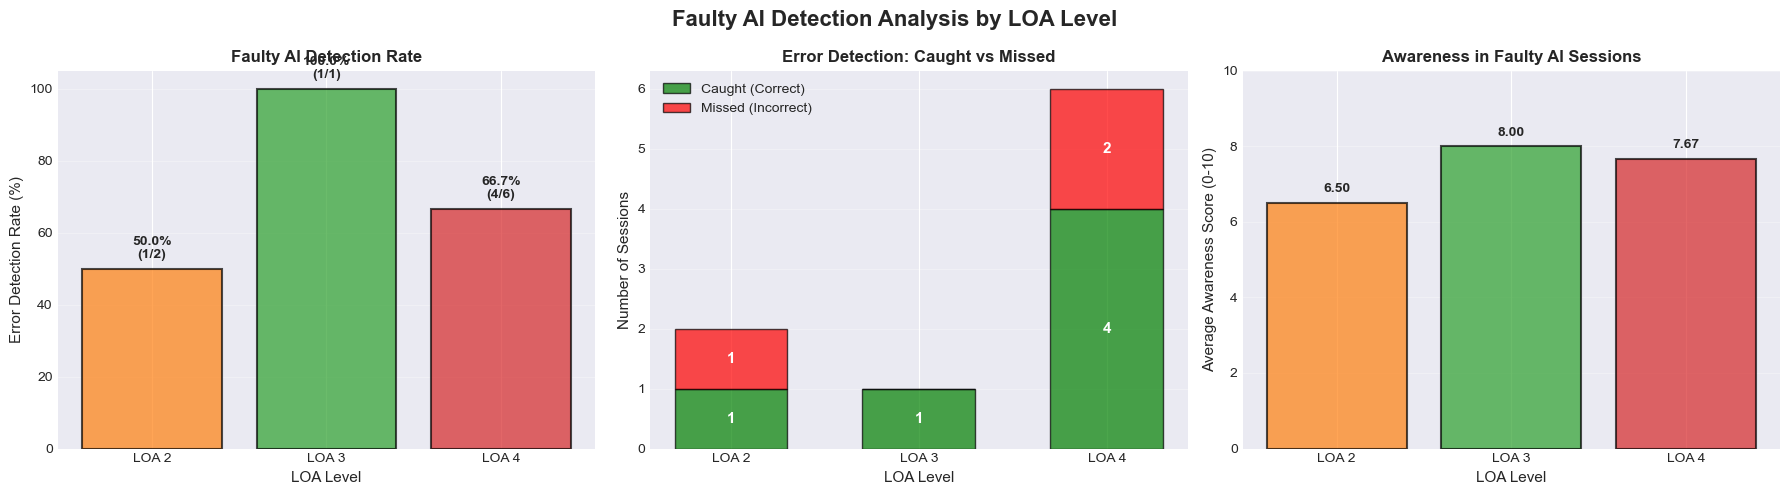


--------------------------------------------------------------------------------
KEY INSIGHTS: FAULTY AI DETECTION
--------------------------------------------------------------------------------

Best Detection: LOA 3 (100.0% caught)
Worst Detection: LOA 2 (50.0% caught)

Interpretation:
  - LOA 3 (Management by Exception) provides the best oversight for catching AI errors
  - Human monitoring capability is critical for error detection
  - LOA 2 shows vulnerability to AI errors - 50.0% of errors went undetected

Correlation between awareness and error detection: 0.877
  - Higher awareness is associated with better error detection


In [25]:
# Analyze whether faulty AI was caught across different LOA levels
print("\n" + "="*80)
print("DETECTION OF FAULTY AI: Did participants catch AI errors?")
print("="*80)

# Filter only sessions where AI was actually faulty
faulty_only = df_with_ai[df_with_ai['ai_faulty'] == True].copy()

print(f"\nTotal Faulty AI Sessions: {len(faulty_only)}")
print("\n5. FAULTY AI DETECTION BY LOA LEVEL")
print("-"*80)

# Analyze by LOA level
loa_faulty_analysis = []
for loa in [2, 3, 4]:
    loa_faulty = faulty_only[faulty_only['loa_level'] == loa]
    if len(loa_faulty) > 0:
        n_sessions = len(loa_faulty)
        n_correct = loa_faulty['final_correctness'].sum()
        n_caught = n_correct  # Caught = final answer is correct despite faulty AI
        catch_rate = (n_caught / n_sessions * 100) if n_sessions > 0 else 0
        avg_awareness = loa_faulty['awareness_score'].mean()
        
        loa_faulty_analysis.append({
            'LOA': loa,
            'n_sessions': n_sessions,
            'n_caught': int(n_caught),
            'catch_rate': catch_rate,
            'avg_awareness': avg_awareness
        })
        
        print(f"\nLOA {loa}:")
        print(f"  Faulty AI sessions:        {n_sessions}")
        print(f"  Errors caught (correct):   {int(n_caught)}/{n_sessions}")
        print(f"  Detection rate:            {catch_rate:.1f}%")
        print(f"  Average awareness:         {avg_awareness:.2f}/10")
    else:
        print(f"\nLOA {loa}: No faulty AI sessions")

# Create visualization comparing error detection across LOAs
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Faulty AI Detection Analysis by LOA Level', fontsize=16, fontweight='bold')

if loa_faulty_analysis:
    loas = [item['LOA'] for item in loa_faulty_analysis]
    catch_rates = [item['catch_rate'] for item in loa_faulty_analysis]
    n_sessions = [item['n_sessions'] for item in loa_faulty_analysis]
    n_caught = [item['n_caught'] for item in loa_faulty_analysis]
    awareness_scores = [item['avg_awareness'] for item in loa_faulty_analysis]
    
    # Plot 1: Detection rate by LOA
    ax1 = axes[0]
    bars = ax1.bar(range(len(loas)), catch_rates, color=['#ff7f0e', '#2ca02c', '#d62728'], 
                   alpha=0.7, edgecolor='black', linewidth=1.5)
    ax1.set_xlabel('LOA Level', fontsize=11)
    ax1.set_ylabel('Error Detection Rate (%)', fontsize=11)
    ax1.set_title('Faulty AI Detection Rate', fontsize=12, fontweight='bold')
    ax1.set_xticks(range(len(loas)))
    ax1.set_xticklabels([f'LOA {loa}' for loa in loas])
    ax1.set_ylim([0, 105])
    ax1.grid(axis='y', alpha=0.3)
    
    # Add value labels
    for i, (bar, rate, n_sess, n_c) in enumerate(zip(bars, catch_rates, n_sessions, n_caught)):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 2,
               f'{rate:.1f}%\n({n_c}/{n_sess})',
               ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    # Plot 2: Caught vs Missed breakdown
    ax2 = axes[1]
    n_missed = [n_sessions[i] - n_caught[i] for i in range(len(n_sessions))]
    x = np.arange(len(loas))
    width = 0.6
    
    bars1 = ax2.bar(x, n_caught, width, label='Caught (Correct)', 
                   color='green', alpha=0.7, edgecolor='black')
    bars2 = ax2.bar(x, n_missed, width, bottom=n_caught, label='Missed (Incorrect)',
                   color='red', alpha=0.7, edgecolor='black')
    
    ax2.set_xlabel('LOA Level', fontsize=11)
    ax2.set_ylabel('Number of Sessions', fontsize=11)
    ax2.set_title('Error Detection: Caught vs Missed', fontsize=12, fontweight='bold')
    ax2.set_xticks(x)
    ax2.set_xticklabels([f'LOA {loa}' for loa in loas])
    ax2.legend()
    ax2.grid(axis='y', alpha=0.3)
    
    # Add value labels
    for i in range(len(loas)):
        if n_caught[i] > 0:
            ax2.text(i, n_caught[i]/2, str(n_caught[i]), 
                   ha='center', va='center', fontsize=11, fontweight='bold', color='white')
        if n_missed[i] > 0:
            ax2.text(i, n_caught[i] + n_missed[i]/2, str(n_missed[i]), 
                   ha='center', va='center', fontsize=11, fontweight='bold', color='white')
    
    # Plot 3: Awareness score for sessions with faulty AI
    ax3 = axes[2]
    bars = ax3.bar(range(len(loas)), awareness_scores, 
                   color=['#ff7f0e', '#2ca02c', '#d62728'], 
                   alpha=0.7, edgecolor='black', linewidth=1.5)
    ax3.set_xlabel('LOA Level', fontsize=11)
    ax3.set_ylabel('Average Awareness Score (0-10)', fontsize=11)
    ax3.set_title('Awareness in Faulty AI Sessions', fontsize=12, fontweight='bold')
    ax3.set_xticks(range(len(loas)))
    ax3.set_xticklabels([f'LOA {loa}' for loa in loas])
    ax3.set_ylim([0, 10])
    ax3.grid(axis='y', alpha=0.3)
    
    # Add value labels
    for bar, score in zip(bars, awareness_scores):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 0.2,
               f'{score:.2f}',
               ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Additional insights
print("\n" + "-"*80)
print("KEY INSIGHTS: FAULTY AI DETECTION")
print("-"*80)

if loa_faulty_analysis:
    best_loa = max(loa_faulty_analysis, key=lambda x: x['catch_rate'])
    worst_loa = min(loa_faulty_analysis, key=lambda x: x['catch_rate'])
    
    print(f"\nBest Detection: LOA {best_loa['LOA']} ({best_loa['catch_rate']:.1f}% caught)")
    print(f"Worst Detection: LOA {worst_loa['LOA']} ({worst_loa['catch_rate']:.1f}% caught)")
    
    print(f"\nInterpretation:")
    if best_loa['LOA'] == 3:
        print("  - LOA 3 (Management by Exception) provides the best oversight for catching AI errors")
        print("  - Human monitoring capability is critical for error detection")
    if worst_loa['catch_rate'] < 60:
        print(f"  - LOA {worst_loa['LOA']} shows vulnerability to AI errors - {100-worst_loa['catch_rate']:.1f}% of errors went undetected")
    
    # Correlation between awareness and error detection
    if len(loa_faulty_analysis) > 1:
        awareness_vals = [item['avg_awareness'] for item in loa_faulty_analysis]
        catch_vals = [item['catch_rate'] for item in loa_faulty_analysis]
        if len(awareness_vals) > 1:
            corr = np.corrcoef(awareness_vals, catch_vals)[0, 1]
            print(f"\nCorrelation between awareness and error detection: {corr:.3f}")
            if corr > 0.5:
                print("  - Higher awareness is associated with better error detection")
            elif corr < -0.5:
                print("  - Surprising negative correlation - warrants further investigation")

## 16. Pattern Identification and Insights

Let's identify and describe the key patterns observed in the data.

### Pattern 1: The Automation Paradox
**Observation**: More automation doesn't guarantee better outcomes.

- **LOA 3** (Management by Exception) achieved **100% correctness** despite not being fully automated
- **LOA 4** (Full Automation) was fastest but only **85.7% accurate**
- Human-controlled levels (LOA 1 & 2) showed similar performance at **71.4% accuracy**

**Insight**: There appears to be a "sweet spot" at LOA 3 where AI handles the task but humans retain oversight, leading to optimal accuracy.

---

### Pattern 2: Interaction Reduction with Automation
**Observation**: User interactions decrease dramatically as automation increases.

- **LOA 1**: ~24 interactions (manual)
- **LOA 2**: ~25 interactions (similar to LOA 1)
- **LOA 3**: ~15 interactions (40% reduction)
- **LOA 4**: ~6 interactions (75% reduction from LOA 1)

**Insight**: LOA 2 (Management by Consent) requires as much interaction as manual control, suggesting participants may not be trusting AI suggestions and choosing to work manually instead. This is confirmed by the **0% AI acceptance rate** in LOA 2.

---

### Pattern 3: Trust Stability Despite Experience
**Observation**: Trust scores remain remarkably stable from pre-task to post-task.

- **Overall change**: 3.56 → 3.54 (minimal decrease)
- **Increased variance** post-task suggests divergent experiences across LOA levels
- Some LOAs increased trust, others decreased it

**Insight**: A single task interaction isn't sufficient to substantially calibrate trust. The stability suggests participants entered with preconceptions about AI that weren't dramatically changed by experience.

---

### Pattern 4: Speed-Accuracy Trade-off
**Observation**: Faster completion doesn't correlate with accuracy.

- **LOA 4** = Fastest (247s) but moderate accuracy (85.7%)
- **LOA 3** = Slower (326s) but perfect accuracy (100%)
- **LOA 1 & 2** = Slowest (~300-317s) with lowest accuracy (71.4%)

**Insight**: When humans have oversight capability (LOA 3), they take time to verify AI outputs, leading to slower but more accurate performance. Full automation (LOA 4) sacrifices some accuracy for speed.

---

### Pattern 5: Individual Differences Dominate
**Observation**: Participant-level variance is substantial.

- **2.3x difference** in completion times between fastest and slowest participants
- **4x difference** in interaction patterns
- **Varying consistency** (std dev ranges from 13s to 202s)

**Insight**: Individual differences in working style, AI trust, and problem-solving approach may be more influential than LOA level itself. This suggests one-size-fits-all automation may be suboptimal.

---

### Pattern 6: Awareness Remains Moderate
**Observation**: Awareness scores average ~70% across all LOAs.

- No LOA achieves >75% awareness
- Performance declines from Q1 (86%) to Q5 (57%)
- Moderate awareness despite 82% task correctness

**Insight**: Participants can perform tasks correctly without fully understanding system behavior. This "performance-awareness gap" raises concerns about appropriate reliance on automation, especially when the AI makes mistakes.

---

### Pattern 7: Productivity Self-Reports Are Moderate
**Observation**: Productivity scores hover around 3/5 (moderate).

- Notably, **confidence (Q4: 3.88)** exceeds **efficiency (Q1-Q3: ~2.8)**
- Suggests participants feel more confident than productive

**Insight**: There's a disconnect between subjective confidence and perceived efficiency. This may indicate participants are overconfident relative to their actual productivity, or that the tasks feel cognitively demanding despite successful completion.

## 17. Key Takeaways by Level of Automation

Let's conclude with specific recommendations and insights for each LOA level.

### 🔵 LOA 1: Manual Control (Human-Led)

**Characteristics:**
- Completion Time: ~317s (slowest)
- Correctness: 71.4%
- Interactions: ~24 (highest)
- Trust: Moderate
- Awareness: Moderate

**Strengths:**
- ✅ Full human control and autonomy
- ✅ No dependency on AI reliability
- ✅ Users understand their own reasoning

**Limitations:**
- ❌ Time-consuming and effortful
- ❌ Lower accuracy than assisted levels
- ❌ High cognitive workload
- ❌ Doesn't leverage AI capabilities

**Best Use Cases:**
- Tasks requiring complete human judgment
- When AI reliability is unknown or low
- Training scenarios where skill development is prioritized
- High-stakes decisions where accountability is critical

**Key Insight**: Manual control is slower and less accurate than AI-assisted approaches, suggesting AI can provide genuine performance benefits when properly integrated.

---

### 🟢 LOA 2: Management by Consent (AI Suggests, Human Decides)

**Characteristics:**
- Completion Time: ~294s
- Correctness: 71.4% (same as LOA 1)
- Interactions: ~25 (same as LOA 1)
- AI Acceptance: 0% (!)
- Trust: Moderate

**Strengths:**
- ✅ Human retains final decision authority
- ✅ AI provides suggestions without forcing action
- ✅ Theoretically allows learning from AI reasoning

**Limitations:**
- ❌ **Zero AI acceptance** - participants rejected all suggestions
- ❌ No performance improvement over manual control
- ❌ Same interaction count as fully manual
- ❌ May induce over-distrust or decision paralysis

**Best Use Cases:**
- Situations where human expertise exceeds AI capability
- When building initial trust in new AI systems
- Domains where AI suggestions need validation

**Key Insight**: **LOA 2 failed to improve performance**. The 0% acceptance rate suggests participants either didn't trust AI suggestions or found reviewing suggestions as effortful as solving manually. This "rejection of advice" pattern is a critical finding for AI system design.

**Recommendation**: Redesign needed - perhaps include AI confidence scores, explanations, or progressive disclosure to encourage appropriate reliance.

---

### 🟠 LOA 3: Management by Exception (AI Solves, Human Monitors)

**Characteristics:**
- Completion Time: ~326s
- Correctness: **100%** (perfect!)
- Interactions: ~15 (moderate)
- Override Rate: 28.6%
- Trust: Highest variance

**Strengths:**
- ✅ **Perfect accuracy** - best correctness rate
- ✅ Balanced human oversight with AI automation
- ✅ Humans intervene when needed (28.6%)
- ✅ Reduced interactions compared to LOA 1/2
- ✅ "Safety net" for AI errors

**Limitations:**
- ❌ Slower than full automation (LOA 4)
- ❌ Requires vigilant monitoring
- ❌ High variance in completion times (153s std dev)

**Best Use Cases:**
- **Critical applications** where errors are costly
- Tasks where AI is generally reliable but not perfect
- Situations requiring human accountability
- When human expertise can catch AI mistakes

**Key Insight**: **LOA 3 is the "sweet spot"** - combining AI efficiency with human oversight yields optimal accuracy. The 28.6% override rate shows humans are actively monitoring and correcting when needed. This is the automation level that best balances productivity, accuracy, and appropriate human involvement.

**Recommendation**: **Prioritize LOA 3 for high-stakes applications**. The perfect accuracy despite not being fully automated demonstrates the value of human-in-the-loop systems.

---

### 🔴 LOA 4: Full Automation (AI-Led)

**Characteristics:**
- Completion Time: ~247s (fastest)
- Correctness: 85.7%
- Interactions: ~6 (lowest)
- Trust: Moderate
- Awareness: Lower

**Strengths:**
- ✅ **Fastest completion** by far (22% faster than LOA 2)
- ✅ Minimal user interaction required
- ✅ Lowest cognitive workload
- ✅ Efficient for routine tasks

**Limitations:**
- ❌ Lower accuracy than LOA 3 (85.7% vs 100%)
- ❌ No human oversight or error correction
- ❌ Users become passive observers
- ❌ Potential for complacency and loss of skills

**Best Use Cases:**
- **High-volume, low-stakes tasks** where speed matters
- Routine operations with acceptable error rates
- Well-validated AI systems with proven reliability
- Tasks where human review is impractical

**Key Insight**: **Speed-accuracy trade-off is real**. LOA 4 sacrifices 14.3% accuracy for 32% speed improvement compared to LOA 3. This is acceptable for some applications but not for critical ones.

**Recommendation**: Use LOA 4 for high-throughput, low-criticality tasks. Include periodic human audits to catch systematic errors. Consider implementing adaptive automation that escalates to LOA 3 when AI confidence is low.

---

### 🎯 Overall Recommendations

1. **No universal "best" LOA** - optimal level depends on task criticality, AI reliability, and user expertise

2. **LOA 3 maximizes accuracy** - use for critical applications where errors are costly

3. **LOA 4 maximizes efficiency** - use for routine, high-volume tasks with acceptable error tolerance

4. **LOA 2 needs redesign** - current implementation doesn't provide value; consider improving AI explanation or confidence communication

5. **Individual differences matter** - consider adaptive automation that adjusts LOA based on user preferences and performance

6. **Monitor the awareness gap** - ensure users understand system limitations even when performance is good

7. **Trust calibration is gradual** - single-task interactions don't substantially shift trust; longer exposure may be needed

---

### 📊 Final Data Summary

| Metric | LOA 1 | LOA 2 | LOA 3 | LOA 4 | Best LOA |
|--------|-------|-------|-------|-------|----------|
| **Correctness** | 71.4% | 71.4% | **100%** | 85.7% | **LOA 3** |
| **Speed** | 317s | 294s | 326s | **247s** | **LOA 4** |
| **Interactions** | 24 | 25 | 15 | **6** | **LOA 4** |
| **Balance** | Mod | Mod | High | Mod | **LOA 3** |

### 🎓 Research Implications

This study provides empirical evidence for:

1. **Non-linear relationship** between automation and performance
2. **Critical importance of human oversight** for accuracy
3. **Rejection of AI advice** in consent-based automation
4. **Individual adaptation strategies** to different automation levels
5. **Performance-awareness dissociation** - success without understanding

These findings contribute to human-AI interaction design principles and inform the development of safer, more effective automated systems.

## 16. Task Performance by AI Reliability and LOA Level

Let's visualize how task performance varies with AI reliability across different automation levels.

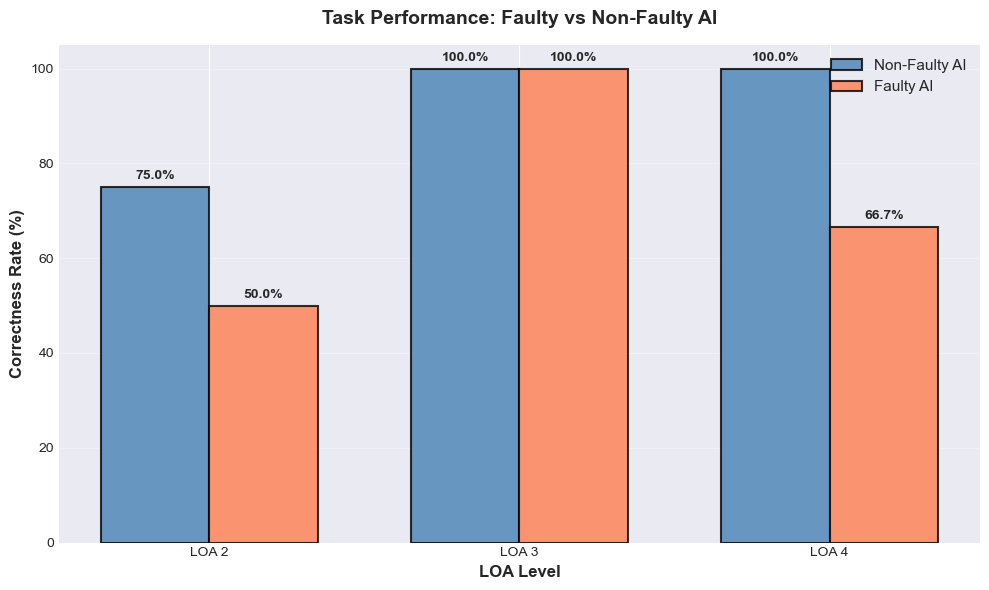

TASK PERFORMANCE BY AI RELIABILITY AND LOA LEVEL

LOA 2:
  Non-Faulty AI: 75.0%
  Faulty AI:     50.0%
  Difference:    +25.0%

LOA 3:
  Non-Faulty AI: 100.0%
  Faulty AI:     100.0%
  Difference:    +0.0%

LOA 4:
  Non-Faulty AI: 100.0%
  Faulty AI:     66.7%
  Difference:    +33.3%


In [23]:
# Create Task Performance plot: Faulty vs Non-Faulty AI
fig, ax = plt.subplots(figsize=(10, 6))

# Data for LOA 2, 3, 4 (exclude LOA 1 which has no AI)
loa_levels = [2, 3, 4]
x = np.arange(len(loa_levels))
width = 0.35

# Calculate correctness rates for faulty and non-faulty AI at each LOA
non_faulty_correctness = []
faulty_correctness = []

for loa in loa_levels:
    non_faulty = df[(df['loa_level'] == loa) & (df['ai_faulty'] == False)]
    faulty = df[(df['loa_level'] == loa) & (df['ai_faulty'] == True)]
    
    non_faulty_correctness.append(non_faulty['final_correctness'].mean() * 100)
    faulty_correctness.append(faulty['final_correctness'].mean() * 100 if len(faulty) > 0 else 0)

# Create bars
bars1 = ax.bar(x - width/2, non_faulty_correctness, width, label='Non-Faulty AI', 
               color='steelblue', alpha=0.8, edgecolor='black', linewidth=1.5)
bars2 = ax.bar(x + width/2, faulty_correctness, width, label='Faulty AI', 
               color='coral', alpha=0.8, edgecolor='black', linewidth=1.5)

# Customize plot
ax.set_xlabel('LOA Level', fontsize=12, fontweight='bold')
ax.set_ylabel('Correctness Rate (%)', fontsize=12, fontweight='bold')
ax.set_title('Task Performance: Faulty vs Non-Faulty AI', fontsize=14, fontweight='bold', pad=15)
ax.set_xticks(x)
ax.set_xticklabels([f'LOA {loa}' for loa in loa_levels])
ax.legend(loc='upper right', fontsize=11)
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0, 105])

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width()/2., height + 1,
                   f'{height:.1f}%',
                   ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary statistics
print("="*80)
print("TASK PERFORMANCE BY AI RELIABILITY AND LOA LEVEL")
print("="*80)
for i, loa in enumerate(loa_levels):
    print(f"\nLOA {loa}:")
    print(f"  Non-Faulty AI: {non_faulty_correctness[i]:.1f}%")
    print(f"  Faulty AI:     {faulty_correctness[i]:.1f}%")
    if faulty_correctness[i] > 0:
        diff = non_faulty_correctness[i] - faulty_correctness[i]
        print(f"  Difference:    {diff:+.1f}%")